In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/data/arpit.goel/30_ClaimPrediction')

train=pd.read_csv('01.RawData/train.csv')
test=pd.read_csv('01.RawData/test.csv')


In [6]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [9]:
idvs=[x for x in train.columns if x not in ['id','target']]
unique_vals=train[idvs].apply(lambda x: np.unique(x).shape[0],axis=0).sort_values()

In [59]:
counter=0
train['count']=1
discrete_vars_summary=[]
continous_vars_summary=[]
for key, value in unique_vals.iteritems():
    if value <= 30:
        var_summary=train.groupby(key)[['count','target']].sum()
        discrete_var_summary=var_summary.copy()
        discrete_var_summary['var']=key
        discrete_var_summary['value']=discrete_var_summary.index
        discrete_vars_summary.append(discrete_var_summary)
        #var_summary=var_summary/var_summary.sum()
        #var_summary.plot.bar()
    else:
        continous_var_summary=train[key].replace(-1, np.nan)
        continous_var_summary=continous_var_summary.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95])
        continous_vars_summary.append(continous_var_summary)
        #plot_data[[key]].plot.kde()
    #plt.title(key)
    #plt.savefig('02.DataExplore/1.Graphs/%s.png'%key)


In [60]:
pd.concat(continous_vars_summary,axis=1).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,max
ps_car_11_cat,595212.0,62.215674,33.012455,1.000000,3.000000,7.000000,13.000000,32.000000,65.000000,93.000000,104.000000,104.000000,104.000000
ps_car_12,595211.0,0.379947,0.058300,0.100000,0.315595,0.316070,0.316228,0.316228,0.374166,0.400000,0.447214,0.468828,1.264911
ps_car_14,552592.0,0.374691,0.045610,0.109545,0.288791,0.301662,0.318119,0.350428,0.373497,0.398121,0.425206,0.444072,0.636396
ps_reg_03,487440.0,0.894047,0.345413,0.061237,0.410030,0.491808,0.538516,0.633443,0.801561,1.083974,1.405792,1.584495,4.037945
ps_car_13,595212.0,0.813265,0.224588,0.250619,0.448301,0.542682,0.593247,0.670867,0.765811,0.906190,1.086896,1.235569,3.720626


In [64]:
pd.concat(discrete_vars_summary).to_csv('02.DataExplore/DiscreteVarsProfile.csv')

In [63]:
unique_vals.ps_car_11_cat


104

In [176]:
all_vars=['ps_calc_05','ps_calc_09','ps_calc_12','ps_calc_07','ps_calc_13','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04',\
    'ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin','ps_ind_01',\
    'ps_ind_03','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin',\
    'ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat',\
    'ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_ind_02_cat','ps_ind_04_cat',\
    'ps_ind_05_cat','ps_car_11','ps_calc_11','ps_calc_14','ps_calc_10','ps_calc_06','ps_calc_08','ps_car_15',\
    'ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_car_11_cat','ps_car_12',\
    'ps_car_14','ps_reg_03','ps_car_13']

cap_vars={'ps_calc_05':4,'ps_calc_09':5,'ps_calc_12':5,'ps_calc_07':6,'ps_calc_13':8,\
          'ps_calc_11':12,'ps_calc_14':15,'ps_calc_10':16}
floor_vars={'ps_car_11':0,'ps_calc_11':12,'ps_calc_14':2,'ps_calc_10':2,'ps_calc_06':4,'ps_calc_08':5}
combine_small_buckets_vars=['ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat',\
                            'ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat',\
                            'ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_11_cat']
missing_vals=['ps_car_14','ps_reg_03']
id_target_rate=train['target'].groupby((train['id']/10000).astype(np.int64)).sum()/10000.0

combine_small_buckets_vars_groups={}
combine_small_buckets_vars_avg_tgt={}
for var in combine_small_buckets_vars:
    freq=train[var].value_counts().sort_values().cumsum()/train.shape[0]
    others_set=freq[freq<0.05].index
    combine_small_buckets_vars_groups[var]=others_set
    new_var=train[var].map(lambda x: 99999 if x in others_set else x)
    combine_small_buckets_vars_avg_tgt[var]=train['target'].groupby(new_var).mean()
avg_tgt_rate=train['target'].mean()
    
def clean_data(df):
    df_clean=df[all_vars+['id']]
    df_clean['id_target_rate']=(df_clean['id']/10000).astype(np.int64).map(id_target_rate)
    for key,value in cap_vars.items():
        df_clean[key]=np.clip(df_clean[key],0,value)
    for key,value in floor_vars.items():
        df_clean[key]=np.clip(df_clean[key],value,100000)
    for var in combine_small_buckets_vars:
        others_set=set(combine_small_buckets_vars_groups[var])
        df_clean[var]=df_clean[var].map(lambda x: 99999 if x in others_set else x)
        df_clean=pd.concat([df_clean,pd.get_dummies(df_clean[var], prefix=var, prefix_sep='_')],axis=1)
        df_clean[var]=df_clean[var].map(combine_small_buckets_vars_avg_tgt[var]).fillna(avg_tgt_rate)
    for var in missing_vals:
        df_clean[var]=np.clip(df_clean[key].fillna(0),0,5)
    return df_clean

train_clean=clean_data(train)
test_clean=clean_data(test)
train_clean['target']=train['target']

/data/arpit.goel/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/arpit.goel/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/arpit.goel/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [177]:
np.random.seed(0)
random_array=np.random.rand(len(train_clean))
ins=train_clean[(random_array<0.7*0.25)|((random_array<0.7)&(train_clean['target']==1))]
oos=train_clean[random_array>=0.7]

train_clean.to_pickle('03.CleanData/train.pkl')
ins.to_pickle('03.CleanData/ins.pkl')
oos.to_pickle('03.CleanData/oos.pkl')

test_clean.to_pickle('03.CleanData/oot.pkl')


In [179]:
print ins['target'].sum(), oos['target'].sum()

 15159 6535


In [175]:
print id_target_rate.shape,id_target_rate.index.max()

(149,) 148


In [100]:
missing_vars=['ps_car_03_cat','ps_car_05_cat','ps_car_07_cat','ps_ind_05_cat','ps_car_09_cat',\
                'ps_ind_02_cat','ps_ind_04_cat','ps_car_02_cat','ps_reg_03','ps_car_14']

for missing_var in missing_vars:
    print missing_var,  train[train[missing_var]==-1]['target'].value_counts().values

 ps_car_03_cat [397781  13450]
ps_car_05_cat [258099   8452]
ps_car_07_cat [10591   898]
ps_ind_05_cat [5325  484]
ps_car_09_cat [517  52]
ps_ind_02_cat [176  40]
ps_ind_04_cat [50 33]
ps_car_02_cat [5]
ps_reg_03 [104712   3060]
ps_car_14 [40897  1723]


In [141]:
for cat_var in combine_small_buckets_vars[:1]:
    print pd.get_dummies(train_clean[cat_var], prefix=cat_var, prefix_sep='_').columns

Index([u'ps_car_01_cat_4', u'ps_car_01_cat_5', u'ps_car_01_cat_6',
       u'ps_car_01_cat_7', u'ps_car_01_cat_8', u'ps_car_01_cat_9',
       u'ps_car_01_cat_10', u'ps_car_01_cat_11', u'ps_car_01_cat_99999'],
      dtype='object')


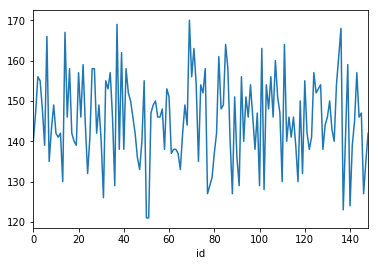

In [136]:
id_target_rate=train['target'].groupby((train['id']/10000).astype(np.int64)).sum().plot()
plt.show()

In [188]:
targets=train[train['target']==1]
a1=pd.DataFrame(train['target'].groupby((train['id']/10000).astype(np.int64)).count())
a2=pd.DataFrame(targets['target'].groupby((targets['id']/10000).astype(np.int64)).count())

pd.merge(a1,a2,left_index=True,right_index=True)

,target_x,target_y
id,,
0,3887,140
1,4005,147
2,4024,156
3,4017,155
4,4010,148
5,4038,139
6,3948,166
7,3999,135
8,3973,143


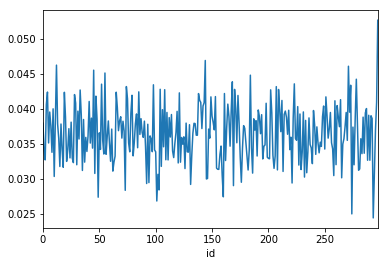

In [194]:
train['target'].groupby((train['id']/5000).astype(np.int64)).mean().plot()
plt.show()

In [201]:
for lag in [100,300,1000,1600,3000,10000,30000]:
    print lag, np.corrcoef((train['id']/lag).astype(np.int64),train['target'])[0,1]
    
for lag in [50,100,300,1000,3000,10000,30000]:
    print lag, np.corrcoef(train['id']%lag,train['target'])[0,1]

100 -0.000188552279017
300 -0.000188632852003
1000 -0.000188217274204
1600 -0.000189863082154
3000 -0.000188516041518
10000 -0.000178188204016
30000 -0.00017476001839
50 0.000217725918267
100 0.00114165833578
300 0.000780335778585
1000 -0.000384231589295
3000 1.98009400297e-05
10000 -0.00153133429436
30000 -0.000679219764073
